In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Rotate image


## def rotate:
#### pix_x,pix_y : coordination of the original pixcle 
#### mid_x,mid_y : coordination of the image center [used for rotaion origin ]
#### teta : angle for rotation
#### rows, cols : boundary of the original image

## Function logic:
#### The function calculate for specific pixcle it's new coordination after perform geometric trasformation

## Return: 
#### The function will return the new coordination if they vaild [in range of boundary], else (-1,-1)

In [26]:
def rotate(pix_x,pix_y,mid_x,mid_y,teta,rows,cols):
    cos_angle = np.cos(np.deg2rad(teta))
    sin_angle = np.sin(np.deg2rad(teta))
    xr = mid_x + (pix_x - mid_x) * cos_angle -(pix_y-mid_y)*sin_angle
    yr= mid_y + (pix_x - mid_x) * sin_angle + (pix_y-mid_y)*cos_angle
    
    xr=int(xr)
    yr=int(yr)
#     print(type(xr))
    if (0<=xr<rows) and (yr in range(cols)):       
        return (xr,yr)
    else:
        return (-1,-1)

In [38]:
def rotate2(xr,yr,teta,mid_x,mid_y):
    cos_angle = np.cos(np.deg2rad(teta))
    sin_angle = np.sin(np.deg2rad(teta))
    
    k1=(xr-mid_x-mid_x*cos_angle+mid_y*sin_angle) 
    k2=yr-mid_y-mid_x*sin_angle -mid_y*cos_angle
    
    x=-1*(k2 + k1*(cos_angle/sin_angle))*sin_angle
    y=(k1 +x*cos_angle)/sin_angle
    
    return(int(x), int(y))

In [29]:
def rotate3 (xr,yr,teta):
    cos_angle = np.cos(np.deg2rad(teta))
    sin_angle = np.sin(np.deg2rad(teta))
    
    y=yr*cos_angle-xr
    x=(xr+y*sin_angle)/cos_angle
    return(int(x),int(y))

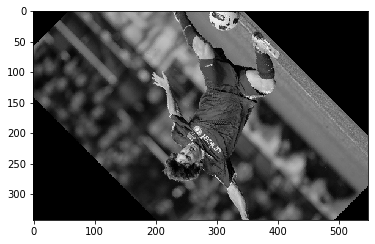

In [46]:
img=cv2.imread('messi.jpg',0)#read as gray scale
new_img=np.zeros_like(img)
rows, cols = new_img.shape
teta=-45
mid_x,mid_y=int(rows/2),int(cols/2)
for row in range(rows):
    for col in range(cols):
#         x, y =rotate3(row,col,teta)
        x, y = rotate2(row, col, teta, mid_x, mid_y)

        if (0<=x<rows) and (0<=y<cols):
            new_img[row, col] =img[x, y] 
plt.imshow(new_img,cmap='gray')
plt.show()
            



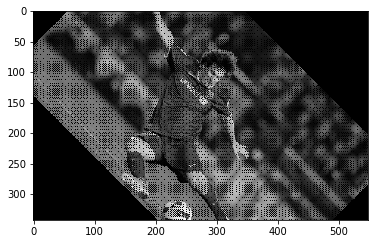

In [31]:
img=cv2.imread('messi.jpg',0)#read as gray scale
rows, cols = img.shape
teta=-45
mid_x,mid_y=int(rows/2),int(cols/2)
rot_img = np.zeros_like(img)
for row in range(rows):
    for col in range(cols):
        new_coordinates = rotate(row,col,mid_x,mid_y,teta,rows,cols)
        if (new_coordinates[0]!= -1 and new_coordinates[1]!= -1):
            x=new_coordinates[0]
            y=new_coordinates[1]
            rot_img[x][y] = img[row][col]
plt.imshow(rot_img,cmap='gray')
cv2.imshow('gg',rot_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Gaussian blur


In [96]:
def subplot(rows,cols,images,titles):
    plt.figure(figsize=[20,10])

    i=1
    while(i<=rows*cols):
        plt.subplot(rows,cols,i)
        plt.imshow(images[i-1],cmap=plt.cm.gray)
        plt.title(titles[i-1])
        i+=1
    plt.show()


In [271]:
def generate_gaussian_noise(img,mean,var):
    sigma=np.sqrt(var)
    gaussian = np.random.normal(mean, sigma, (img.shape[0],img.shape[1])) 

    noise = np.zeros_like(img, np.float32)
    if len(img.shape) == 2:
        noise = img + gaussian
    else:
        noise[:, :, 0] = img[:, :, 0] + gaussian
        noise[:, :, 1] = img[:, :, 1] + gaussian
        noise[:, :, 2] = img[:, :, 2] + gaussian
    return noise

In [212]:
def convol2d(image,kernel):
    kernel=np.flip(np.flip(kernel,axis=0),axis=1)
    output=np.zeros_like(image)
    image_pad= np.pad(image,(kernel.shape[0]//2,kernel.shape[1]//2), 'constant', constant_values=(0, 0))
    
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            output[x][y] = (kernel*image_pad[x:x+kernel.shape[0],y:y+kernel.shape[1]]).sum()
    return output
    

def dimension(image,kernel):
    
    if len(image.shape) != 2:
        output=np.zeros_like(image)
        for dim in range(image.shape[2]):
            output[:,:,dim] = convol2d(image[:,:,dim],kernel)
    else:
          output=convol2d(image,kernel)

    return output
    

In [213]:
def MSE (original_image,changed_image):
    err = np.sum((original_image.astype("float") - changed_image.astype("float")) ** 2)
    err /= float(original_image.shape[0] * original_image.shape[1])
    return err


In [236]:
def absolute_difference (original_image,changed_image):
    abs_diff = np.sum(abs(original_image.astype("float") - changed_image.astype("float")))
    return abs_diff


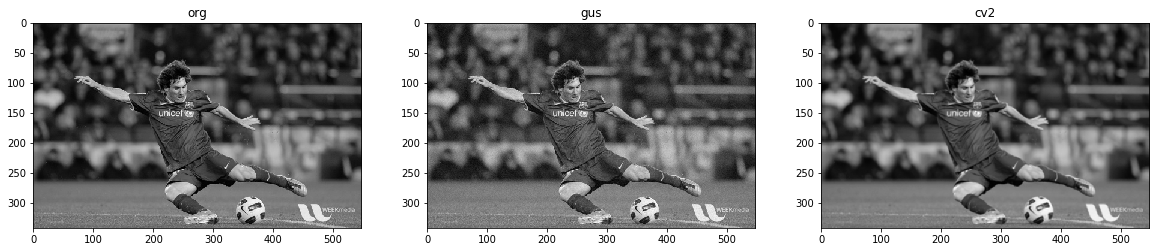

In [269]:
img=cv2.imread('messi.jpg',0)#read as gray scale
blur = cv2.GaussianBlur(img,(3,3),0)
manual_gaus_blur=generate_gaussian_noise(img,0,25)
subplot(1,3,[img,manual_gaus_blur,blur],['org','gus','cv2'])


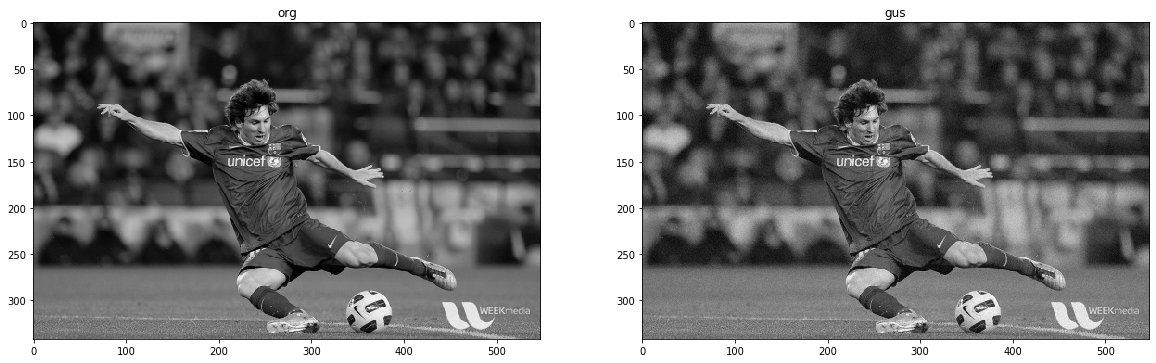

In [270]:
img=cv2.imread('messi.jpg',0)
# img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

gaus=generate_gaussian_noise(img,0,25)
image_equalized=gaus/np.max(np.abs(gaus))
subplot(1,2,[img,image_equalized],['org','gus'])

# noise reduction, histogram, absolut difference and MSE

In [230]:
box_kernel=np.array([[1,1,1],[1,1,1],[1,1,1]])/9
gaussian_kernel = np.array([[1,2,1] , [2,4,2],[1,2,1]])/16
image_box=dimension(gaus,box_kernel)
image_gaus=dimension(gaus,gaussian_kernel)

import scipy.signal #for comparsion my result
scipy_image_box=scipy.signal.convolve2d(gaus,box_kernel,'same')
scipy_image_gaus=scipy.signal.convolve2d(gaus,gaussian_kernel,'same')



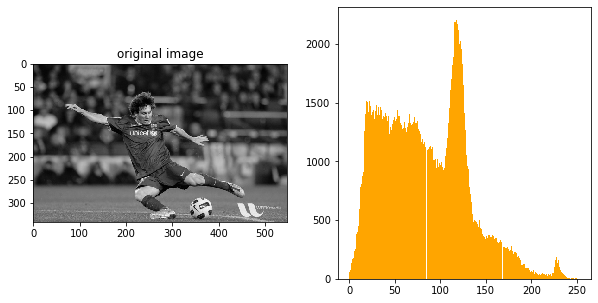

MSE: 0.0


In [273]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
# plt.imshow(img)
plt.title('original image')
plt.subplot(1,2,2)

plt.hist(img.ravel(), bins = 256,color = 'orange')

plt.show()
print('MSE:', MSE(img,img))

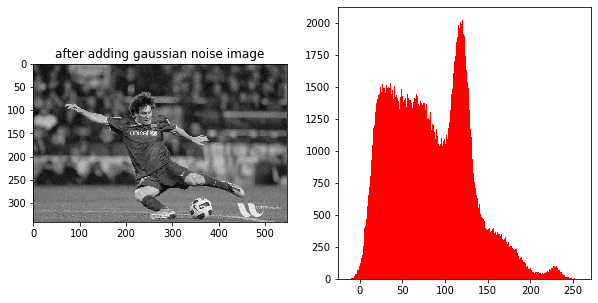

____________________________________________
absolute difference: 745980.7252303875
MSE: 24.931839478251277
____________________________________________


In [274]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(gaus,cmap='gray')
# plt.imshow(gaus)
plt.title('after adding gaussian noise image')

plt.subplot(1,2,2)

plt.hist(gaus.ravel(), bins = 256,color = 'red')

plt.show()
print('____________________________________________')
print('absolute difference:', absolute_difference(img,gaus))
print('MSE:', MSE(img,gaus))
print('____________________________________________')

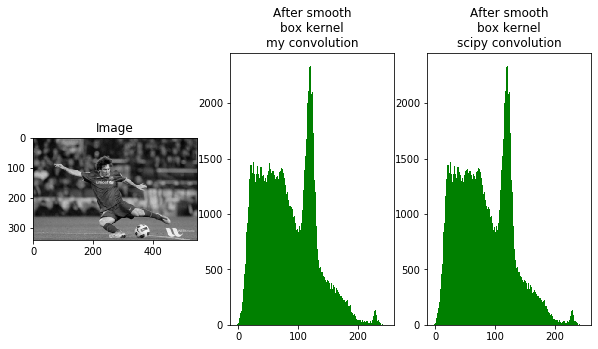

____________________________________________
absolute difference: 719776.8666157802
MSE: 63.67309954594041
cv2 MSE: 63.67309954594041
____________________________________________


In [276]:
plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
plt.imshow(image_box,cmap='gray')
# plt.imshow(image_box)
plt.title('Image')

plt.subplot(1,3,2)
plt.hist(image_box.ravel(), bins = 256,color = 'Green')
plt.title('After smooth\nbox kernel\nmy convolution')

plt.subplot(1,3,3)

plt.hist(scipy_image_box.ravel(), bins = 256,color = 'Green')
plt.title('After smooth\nbox kernel\nscipy convolution')

plt.show()
print('____________________________________________')
print('absolute difference:', absolute_difference(img,image_box))
print('MSE:', MSE(img,image_box))
print('cv2 MSE:', MSE(img,scipy_image_box))
print('____________________________________________')

NameError: name 'image_gaus' is not defined

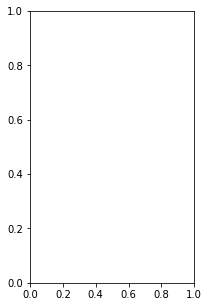

In [47]:
plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
plt.imshow(image_gaus,cmap='gray')
# plt.imshow(image_gaus)
plt.subplot(1,3,2)
plt.hist(image_gaus.ravel(), bins = 256,color = 'blue')
plt.title('After smooth\ngaussian kernel\nscipy convolution')
plt.subplot(1,3,3)
plt.hist(image_gaus_y.ravel(), bins = 256,color = 'blue')

plt.title('After smooth\ngaussian kernel\nmy convolution')


plt.show()
print('____________________________________________')
print('absolute difference:', absolute_difference(img,image_gaus))
print('MSE:', MSE(img,image_gaus))
print('cv2 MSE:', MSE(img,scipy_image_gaus))
print('____________________________________________')

In [245]:
def rotate1(pix_x,pix_y,mid_x,mid_y,teta,rows,cols):
    cos_angle = np.cos(np.deg2rad(teta))
    sin_angle = np.sin(np.deg2rad(teta))
    xr =  (pix_x) * cos_angle -(pix_y)*sin_angle
    yr= (pix_x) * sin_angle + (pix_y)*cos_angle

    xr=int(xr)
    yr=int(yr)
    if (xr in range(rows)) and (yr in range(cols)):       
        return (xr,yr)
    else:
        return (-1,-1)

In [7]:
def get_median(kernel):
    return np.medain(np.flatten(kernel))

def get_new_kernel(img, pix_x, pix_y, kernel):
    lenght,width=kernel.shape
    lowerx = pix_x - lenght // 2
    upperx = pix_x + lenght // 2
    lowery = pix_y - width // 2
    uppery = pix_y + width // 2
    for i in range(lowerx, upperx):
        for j in range(lowery, uppery):
            k[i,j]=img[i, j]
    return k

In [ ]:
img=cv2.imread('messi.jpg',0)#read as gray scale
new_img=np.zeros_like(img)
kernel=zeros(3,3)
image_pad= np.pad(img,(kernel.shape[0] // 2,kernel.shape[1] // 2), 'constant', constant_values=(0, 0))
rows,cols=image_pad.shape

for row in range(rows):
    for col in range(cols):
        

In [3]:
a=2.51
print(round(a))

3
